In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
import shap

import warnings
warnings.filterwarnings('ignore')

# Evaluation Metrics

Pada kasus Ecommerce churn prediction ini, kami menggunakan **Recall** sebagai metrics utama karena tujuan utama dari prediksi model ini adalah mencegah customer untuk churn jika ia terdeteksi churn, maka dari itu dengan metrics recall prediksi kami dapat berfokus sebanyak-banyaknya customer yang berpotensi untuk churn untuk mencegah mereka untuk churn.

Customer yang diprediksi akan churn akan diberikan kupon atau penawaran spesial agar mereka tidak churn, namun karena dataset ini mempunyai target yang imbalance, untuk mencegah memberikan terlalu banyak kupon kepada customer yang tidak berpotensi churn maka kami akan memakai metrics **ROC_AUC** sebagai tambahan.

# Read Dataset

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 40F4-F4CD

 Directory of C:\Users\DELL\Documents\Bryan\Rakamin\Intellegend-Final-Project

01/03/2022  04:07    <DIR>          .
01/03/2022  04:07    <DIR>          ..
14/02/2022  00:27                66 .gitattributes
01/03/2022  01:00    <DIR>          .ipynb_checkpoints
23/02/2022  10:31    <DIR>          catboost_info
17/02/2022  17:18            95.545 df_test.csv
21/02/2022  18:41           279.065 df_test_2.csv
17/02/2022  17:18           365.331 df_train.csv
21/02/2022  18:41         1.079.863 df_train_2.csv
26/01/2021  10:20           555.610 E Commerce Dataset.xlsx
14/02/2022  01:55    <DIR>          Guidance
01/03/2022  03:42            98.326 Insight.ipynb
18/02/2022  23:28         7.662.688 Laporan Final Project - Ghoib CC.pptx
01/03/2022  04:07         8.814.208 Laporan Final Project - Intellegend.pptx
21/02/2022  22:01         7.738.687 Laporan Final Project - Stage 3.pptx
27/01/2022  18:35         7.844.126 Pandas

In [3]:
df_train = pd.read_csv('df_train_2.csv')
df_test = pd.read_csv('df_test_2.csv')

In [4]:
df_train.isna().sum()

Tenure                                   0
PreferredLoginDevice                     0
CityTier                                 0
WarehouseToHome                          0
Gender                                   0
HourSpendOnApp                           0
NumberOfDeviceRegistered                 0
SatisfactionScore                        0
NumberOfAddress                          0
Complain                                 0
OrderAmountHikeFromlastYear              0
OrderCount                               0
DaySinceLastOrder                        0
CashbackAmount                           0
PreferredPaymentMode_Cash on Delivery    0
PreferredPaymentMode_Credit Card         0
PreferredPaymentMode_Debit Card          0
PreferredPaymentMode_E wallet            0
PreferredPaymentMode_UPI                 0
PreferedOrderCat_Fashion                 0
PreferedOrderCat_Grocery                 0
PreferedOrderCat_Laptop & Accessory      0
PreferedOrderCat_Mobile                  0
PreferedOrd

In [5]:
df_train.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Churn
0,0.083451,0.0,0.0,0.500134,1.0,0.515888,0.535825,0.764137,0.446283,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,0.749564,0.0,0.0,0.541002,1.0,0.760605,0.759556,0.521245,0.446283,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,0.000000,0.0,0.0,0.346835,0.0,0.515888,0.535825,0.521245,0.279288,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.536924,1.0,0.0,0.281064,0.0,0.263824,0.331418,0.268562,0.279288,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4,0.327233,0.0,0.0,0.454840,0.0,0.263824,0.331418,0.268562,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0


In [6]:
X_train = df_train.drop('Churn', axis = 1)
y_train = df_train['Churn']
X_test = df_test.drop('Churn', axis = 1)
y_test = df_test['Churn']

# Baseline Model

In [7]:
X_train

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.083451,0.0,0.0,0.500134,1.0,0.515888,0.535825,0.764137,0.446283,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.749564,0.0,0.0,0.541002,1.0,0.760605,0.759556,0.521245,0.446283,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.0,0.0,0.346835,0.0,0.515888,0.535825,0.521245,0.279288,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.536924,1.0,0.0,0.281064,0.0,0.263824,0.331418,0.268562,0.279288,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.327233,0.0,0.0,0.454840,0.0,0.263824,0.331418,0.268562,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4324,0.083451,0.0,0.0,0.881135,0.0,0.760605,0.535825,0.521245,0.279288,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4325,0.568900,0.0,1.0,0.643553,0.0,0.515888,0.535825,0.000000,0.738103,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4326,0.465338,0.0,0.0,0.454840,1.0,0.515888,0.759556,0.764137,0.958397,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4327,0.083451,0.0,0.0,1.000000,0.0,0.760605,0.535825,1.000000,0.446283,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [8]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
4324    0
4325    1
4326    0
4327    0
4328    1
Name: Churn, Length: 4329, dtype: int64

In [9]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [10]:
print(f'Recall Score = {recall_score(y_test, y_pred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')

Recall Score = 0.651685393258427
ROC_AUC Score = 0.810287141073658


In [11]:
LRP = { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': np.logspace(-4,4,20)
    }

In [12]:
LR = LogisticRegression()
GSCV = GridSearchCV(LR, LRP, cv = 5, n_jobs = -1, verbose = 0, scoring = 'recall')
GSCV.fit(X_train, y_train)
y_pred = GSCV.predict(X_test)
print(f'Recall Score = {recall_score(y_test, y_pred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')

Recall Score = 0.651685393258427
ROC_AUC Score = 0.8080649188514357


In [13]:
y_pred_train = GSCV.predict(X_train)
print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')

Recall Score = 0.5624161073825503
ROC_AUC Score = 0.7608397501198465


Jika dilihat dari model baseline, model tersebut adalah model yang undertrain. karena itu kita perlu menaikkan variance dari model dengan menggunakan model-model boosting. Namun model-model lain akan tetap dicoba untuk menguji performa mereka

In [14]:
models = [DecisionTreeClassifier(random_state = 42),
          KNeighborsClassifier(),
          SVC(random_state = 42),
         RandomForestClassifier(random_state = 42),
         GradientBoostingClassifier(random_state = 42),
         XGBClassifier(random_state = 42, use_label_encoder=False),
         AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = 469), random_state = 42),
         CatBoostClassifier(random_state = 42, verbose = False)]
names = ['Decision Tree',
         'KNN',
         'SVM',
       'Random Forest',
       'Gradient Boosting',
       'XGBoost',
       'AdaBoost',
       'CatBoost']

# Before Hyperparameter Tuning

In [7]:
def model_score(model, name):
    print(f'{name}:')
    model = model
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')
    print('Test score:')
    y_pred = model.predict(X_test)
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    print('\n')

In [16]:
for i in range(len(models)):
    model_score(models[i], names[i])

Decision Tree:
Recall Score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.8764044943820225
ROC_AUC Score = 0.905980024968789


KNN:
Recall Score = 0.6671140939597315
ROC_AUC Score = 0.8230938773370086
Test score:
Recall Score = 0.47191011235955055
ROC_AUC Score = 0.7181772784019975


SVM:
Recall Score = 0.6496644295302013
ROC_AUC Score = 0.8188333308365291
Test score:
Recall Score = 0.6629213483146067
ROC_AUC Score = 0.8247940074906367


Random Forest:
Recall Score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.8202247191011236
ROC_AUC Score = 0.907334581772784


Gradient Boosting:
Recall Score = 0.7046979865771812
ROC_AUC Score = 0.8421648415028763
Test score:
Recall Score = 0.6797752808988764
ROC_AUC Score = 0.8287765293383271


XGBoost:
[19:16:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'log

# After Hyperparameter Tuning

In [17]:
def plusNone(arr):
    return np.array(arr.tolist() + [None])

In [18]:
params = [
    { # Decision Tree
        'max_depth': plusNone(np.linspace(1, 32, 32, endpoint=True)),
        'min_samples_split': list(range(0,10)),
        'min_samples_leaf': list(range(0,10)),
        'max_features': plusNone(np.array(range(1,X_train.shape[1])))
    },
    { # KNearestNeighbor
        'leaf_size': list(range(1,50)),
        'n_neighbors': list(range(1,30)),
        'p': [1,2],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    {# SVC
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']
    }, 
    {#Random Forest
        'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    },
    {# Gradient Boosting
        "n_estimators":[5,50,250,500],
        "max_depth":[1,3,5,7,9],
        "learning_rate":[0.01,0.1,1,10,100]
    },
    { # XGBoost
#         'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 5)],
        'gamma' : [float(x) for x in np.linspace(0, 1, num = 5)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],

        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 5)],
        'eta' : [float(x) for x in np.linspace(0, 1, num = 10)],

        'lambda' : [float(x) for x in np.linspace(0, 1, num = 5)],
        'alpha' : [float(x) for x in np.linspace(0, 1, num = 5)]
    },
    { # Adaboost
       'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)],
       'learning_rate': [float(x) for x in np.linspace(start = 0.001, stop = 1, num = 20)],
       'algorithm': ['SAMME', 'SAMME.R']
    },
    {# Catboost
        'max_depth': [3,4,5],
        'n_estimators':[100, 200, 300]
    }
]

In [19]:
def model_score_tune_rscv(model, name, params, n_iter = 10, verbose = 0):
    print(f'{name}:')
    RSCV = RandomizedSearchCV(model, params, cv = 2, n_jobs = -1, verbose = verbose, scoring = ['recall', 'roc_auc'], random_state = 42, refit = 'recall', n_iter = n_iter)
    RSCV.fit(X_train, y_train)
    y_pred_train = RSCV.predict(X_train)
    print('Train score:')
    print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')
    y_pred = RSCV.predict(X_test)
    print('Test score:')
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    print(RSCV.best_params_)
    print('\n')

In [20]:
def model_score_tune_gscv(model, name, params, verbose = 0):
    print(f'{name}:')
    GSCV = GridSearchCV(model, params, cv = 2, n_jobs = -1, verbose = verbose, scoring = 'recall')
    GSCV.fit(X_train, y_train)
    y_pred_train = GSCV.predict(X_train)
    print('Train score:')
    print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')
    y_pred = GSCV.predict(X_test)
    print('Test score:')
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    print(GSCV.best_params_)
    print('\n')

In [21]:
def rand_state(model, name, params = {'random_state' : (range(0,1000))}):
    print(f'{name}:')
    GSCV = GridSearchCV(model, params, cv = 2, n_jobs = -1, verbose = 0, scoring = 'recall')
    GSCV.fit(X_train, y_train)
    y_pred_train = GSCV.predict(X_train)
    print('Train score:')
    print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')
    y_pred = GSCV.predict(X_test)
    print('Test score:')
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    print(GSCV.best_params_)
    print('\n')

In [22]:
def rand_state(model, par, n = range(0,1000)):
    recalls = []
    ROC_AUCs = []
    for i in n:
#         model = DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = i)
        model = model
        for k, v in par.items():
            setattr(model, k, v)
        setattr(model, 'random_state', i)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        recalls.append(recall_score(y_test, y_pred))
        ROC_AUCs.append(roc_auc_score(y_test, y_pred))
    recArr = np.array(recalls)
    rocArr = np.array(ROC_AUCs)
    print(f'max recall = {recArr.max()}, rs = {recArr.argmax()}')
    print(f'max ROC_AUC = {rocArr.max()}, rs = {rocArr.argmax()}')

In [116]:
rand_state(DecisionTreeClassifier(), {'max_depth': 16.0, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 2})

max recall = 0.8932584269662921, rs = 469
max ROC_AUC = 0.9288514357053682, rs = 657


In [118]:
rand_state(RandomForestClassifier(), {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200})

max recall = 0.9157303370786517, rs = 26
max ROC_AUC = 0.9561985018726592, rs = 247


In [45]:
for i in range(0,1):
    model_score_tune_gscv(models[i], names[i], params[i])

Decision Tree:
Train score:
Recall Score = 0.9973154362416108
ROC_AUC Score = 0.9986577181208054
Test score:
Recall Score = 0.8932584269662921
ROC_AUC Score = 0.9255181023720348
{'max_depth': 16.0, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}




In [107]:
model = DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = 469)
model_score(model, 'Decision Tree')

Decision Tree:
Recall Score = 0.9906040268456375
ROC_AUC Score = 0.9943254509228188
Test score:
Recall Score = 0.8932584269662921
ROC_AUC Score = 0.9260736579275904




In [124]:
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = 469), random_state = 42)
model_score(model, 'AdaBoost')

AdaBoost:
Recall Score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.8314606741573034
ROC_AUC Score = 0.9073970037453184




In [26]:
for i in range(0,3):
    model_score_tune_gscv(models[i], names[i], params[i])

Decision Tree:
Recall Score = 0.0
ROC_AUC Score = 0.5
{'max_depth': 6.0, 'max_features': 8, 'min_samples_leaf': 0.1, 'min_samples_split': 0.30000000000000004}


KNN:
Recall Score = 0.8426966292134831
ROC_AUC Score = 0.9063483146067415
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'p': 1}


SVM:
Recall Score = 0.898876404494382
ROC_AUC Score = 0.8849937578027466
{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}




In [27]:
model_score_tune_gscv(models[3], names[3], params[3])

Random Forest:
Recall Score = 0.898876404494382
ROC_AUC Score = 0.9472159800249688
{'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}




In [123]:
model_score(RandomForestClassifier(**{'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 26}), 'Random Forest')

Random Forest:
Recall Score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.9157303370786517
ROC_AUC Score = 0.9545318352059924




In [28]:
model_score_tune_gscv(models[4], names[4], params[4])

Gradient Boosting:
Recall Score = 1.0
ROC_AUC Score = 0.5
{'learning_rate': 100, 'max_depth': 1, 'n_estimators': 5}




In [41]:
model_score_tune_rscv(models[5], names[5], params[5], 1000, verbose = 1)

XGBoost:
Fitting 2 folds for each of 1000 candidates, totalling 2000 fits
[00:16:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score:
Recall Score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.8876404494382022
ROC_AUC Score = 0.9360424469413233
{'tree_method': 'auto', 'min_child_weight': 1, 'lambda': 1.0, 'gamma': 0.0, 'eta': 0.8888888888888888, 'colsample_bytree': 1.0, 'alpha': 0.25}




In [81]:
par = {'tree_method': 'auto', 'min_child_weight': 1, 'lambda': 0.1, 'gamma': 0, 'eta': 0.9, 'colsample_bytree': 1.0, 'alpha': 0.25, 'random_state' : 42, 'use_label_encoder':False, 'scale_pos_weight': 5}
model = XGBClassifier(**par)
model_score(model, 'XGBoost')

XGBoost:
[00:21:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Recall Score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.9269662921348315
ROC_AUC Score = 0.9484831460674158




In [145]:
par = {'max_depth': 6, 'tree_method': 'auto', 'min_child_weight': 2, 'lambda': 1, 'gamma': 0, 'eta': 0.9, 'colsample_bytree': 0.8, 'alpha': 0.25, 'use_label_encoder':False, 'scale_pos_weight': 5,  'eval_metric': 'logloss'}
recalls = []
ROC_AUCs = []
for i in range(1000):
    model = XGBClassifier(**par)
    setattr(model, 'random_state', i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recalls.append(recall_score(y_test, y_pred))
    ROC_AUCs.append(roc_auc_score(y_test, y_pred))
recArr = np.array(recalls)
rocArr = np.array(ROC_AUCs)
print(f'max recall = {recArr.max()}, rs = {recArr.argmax()}')
print(f'max ROC_AUC = {rocArr.max()}, rs = {rocArr.argmax()}')

max recall = 0.9550561797752809, rs = 322
max ROC_AUC = 0.9613857677902623, rs = 830


In [146]:
par = {'max_depth': 6, 'tree_method': 'auto', 'min_child_weight': 2, 'lambda': 1, 'gamma': 0, 'eta': 0.9, 'colsample_bytree': 0.8, 'alpha': 0.25, 'random_state' : 322, 'use_label_encoder':False, 'scale_pos_weight': 5, 'eval_metric': 'logloss'}
model = XGBClassifier(**par)
model_score(model, 'XGBoost')

XGBoost:
Recall Score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.9550561797752809
ROC_AUC Score = 0.9597503121098626




In [129]:
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = 469), random_state = 42)
model_score(model, 'AdaBoost')

AdaBoost:
Recall Score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.8314606741573034
ROC_AUC Score = 0.9073970037453184




In [150]:
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = 469), random_state = 42, learning_rate = 0.01, n_estimators = 20, algorithm = 'SAMME')
model_score(model, 'AdaBoost')

AdaBoost:
Recall Score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.898876404494382
ROC_AUC Score = 0.9466604244694132




In [153]:
par = {
    'base_estimator' : DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = 469),
    'learning_rate' : 0.01,
    'n_estimators' : 20,
    'algorithm' : 'SAMME'
}

In [152]:
rand_state(AdaBoostClassifier(), par)

max recall = 0.9269662921348315, rs = 433
max ROC_AUC = 0.9562297128589264, rs = 476


In [154]:
par = {
    'base_estimator' : DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = 469),
    'learning_rate' : 0.01,
    'n_estimators' : 20,
    'algorithm' : 'SAMME',
    'random_state' : 433
}

In [155]:
model_score(AdaBoostClassifier(**par), 'AdaBoost')

AdaBoost:
Recall Score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.9269662921348315
ROC_AUC Score = 0.9395942571785268




In [70]:
for i in range(7,len(models)):
    model_score_tune_gscv(models[i], names[i], params[i])

CatBoost:
Train score:
Recall Score = 0.8536912751677852
ROC_AUC Score = 0.9239159500838926
Test score:
Recall Score = 0.7640449438202247
ROC_AUC Score = 0.8698002496878902
{'max_depth': 5, 'n_estimators': 100}




# Model Score

**Decision Tree:**
- Recall Score = 0.8932584269662921
- ROC_AUC Score = 0.9255181023720348

**KNN:**
- Recall Score = 0.8426966292134831
- ROC_AUC Score = 0.9063483146067415

**SVM:**
- Recall Score = 0.898876404494382
- ROC_AUC Score = 0.8849937578027466

**Random Forest:**
- Recall Score = 0.9157303370786517
- ROC_AUC Score = 0.9545318352059924

**Gradient Boosting:**
- Recall Score = 1.0
- ROC_AUC Score = 0.5

**XGBoost:**
- Recall Score = 0.9550561797752809
- ROC_AUC Score = 0.9597503121098626

**AdaBoost:**
- Recall Score = 0.9269662921348315
- ROC_AUC Score = 0.9395942571785268

**CatBoost:**
- Recall Score = 0.7640449438202247
- ROC_AUC Score = 0.8698002496878902

Dari model score diatas dapat disimpulkan bahwa XGBoost memiliki performa yang paling baik

# Feature Importance

In [148]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [10]:
par = {'max_depth': 6, 'tree_method': 'auto', 'min_child_weight': 2, 'lambda': 1, 'gamma': 0, 'eta': 0.9, 'colsample_bytree': 0.8, 'alpha': 0.25, 'random_state' : 322, 'use_label_encoder':False, 'scale_pos_weight': 5, 'eval_metric': 'logloss'}
model = XGBClassifier(**par)
model_score(model, 'XGBoost')

XGBoost:
Recall Score = 1.0
ROC_AUC Score = 1.0
Precision Score = 1.0
Test score:
Recall Score = 0.9550561797752809
ROC_AUC Score = 0.9597503121098626
Precision Score = 0.8415841584158416




In [14]:
y_test.value_counts()

0    900
1    178
Name: Churn, dtype: int64

In [9]:
def model_score(model, name):
    print(f'{name}:')
    model = model
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')
    print(f'Precision Score = {precision_score(y_train, y_pred_train)}')
    print('Test score:')
    y_pred = model.predict(X_test)
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    print(f'Precision Score = {precision_score(y_test, y_pred)}')
    print('\n')

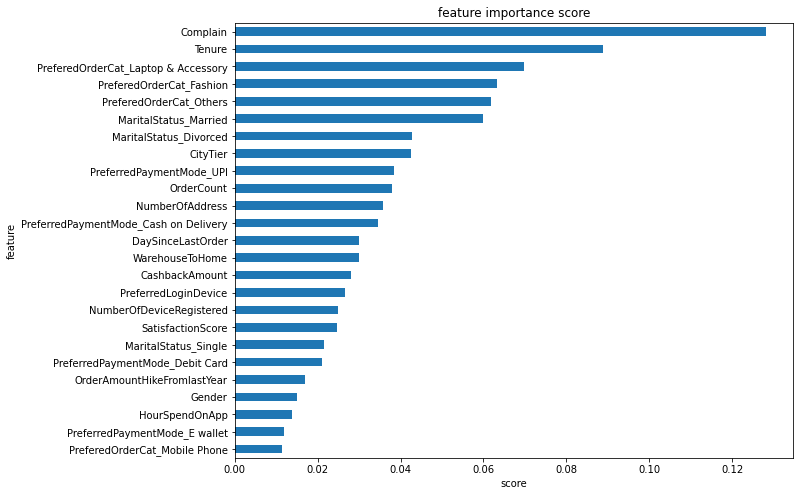

In [150]:
show_feature_importance(model)

# Shap Values

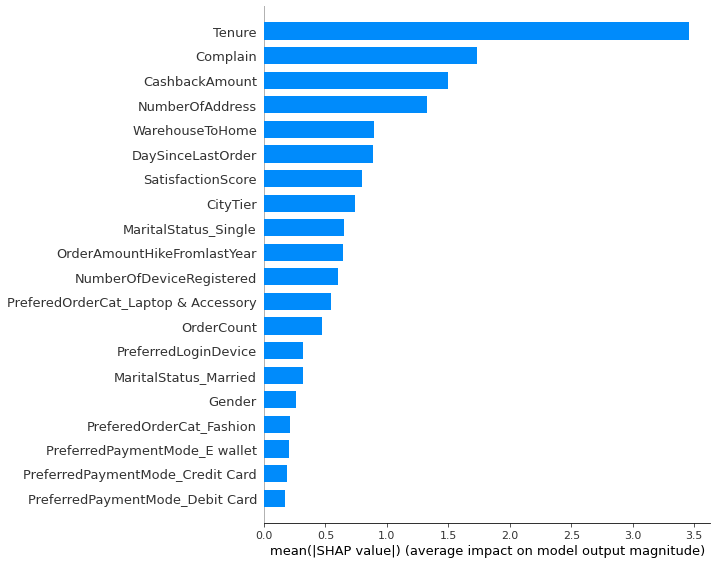

In [167]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)
shap.summary_plot(shap_values.values, X_train, plot_type="bar")

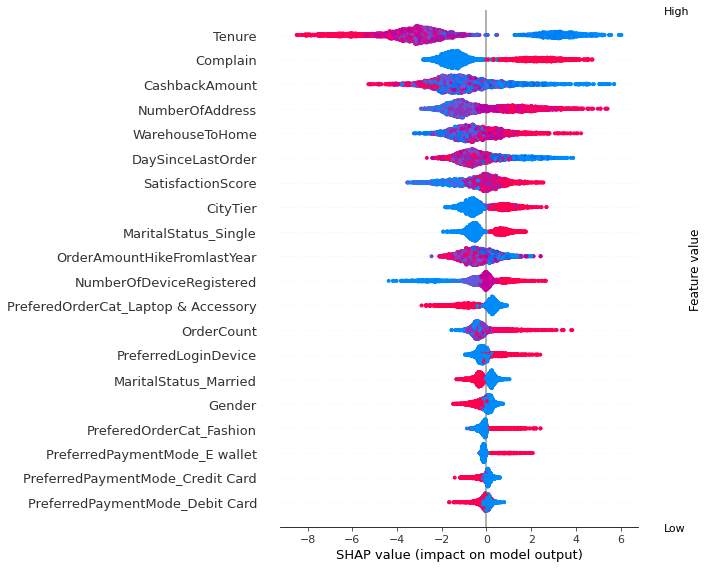

In [183]:
f = plt.figure(figsize = (12,8))
shap.summary_plot(shap_values, X_train, show = False)
plt.gcf().axes[-1].set_aspect(1000)

Feature yang mempunyai pengaruh besar adalah:
- Complain
- Tenure
- PreferedOrderCat
- MaritalStatus
- CashbackAmount
- WarehouseToHome
- DaySinceLastOrder
- NumberOfAddress
- OrderAmountHikeFromlastYear
- SatisfactionScore
- NumberOfDeviceRegistered
- OrderCount
- CityTier
- MaritalStatus_Single
- PreferredLoginDevice
- PreferredPaymentMode

Melihat dari feature-feature yang penting diatas dapat ditarik kesimpulan bahwa, untuk mencegah terjadinya customer churn, pelanggan butuh diberikan Cashback 1.6x lebih besar sampai setidaknya 2 bulan (2 bulan disini merupakan insight yang didapat dari EDA). Hal ini dapat kita tarik sebagai kesimpulan karena terlihat CashbackAmount dan Tenure merupakan feature yang paling berpengaruh pada churn customer. Selain itu Complain dari customer juga memiliki dampak besar, jika customer memiliki complain harus diselesaikan dengan segera, karena complain yang tidak diselesaikan dapat menyebabkan customer churn dan menurunkan SatisfactionScore yang juga berdampak pada meningkatnya kecenderungan customer untuk churn.

Selain itu jumlah warehouse juga perlu diperbanyak di tempat yang memiliki banyak customer, karena warehouse yang terlalu jauh menyebabkan customer churn. Pihak Ecommerce juga harus menjaga DaySinceLastOrder tetap stabil, jika customer terlalu sering atau terlalu jarang menggunakan Ecommerce ini, maka customer tersebut akan berpotensi churn karena itulah customer perlu diberikan voucher mingguan yang membuat belanja mereka teratur setiap minggunya. Pembagian voucher ini juga dapat menaikkan OrderAmountHikeFromlastYear yang dapat mencegah terjadinya churn.

NumberOfAddress dan NumberOfDeviceRegistered yang tinggi terlihat berpotensi menyebabkan customer untuk churn, karena itulah sebaiknya dibatasi menjadi maksimal 3. Gender, CityTier, dan MaritalStatus dari customer pun cukup berpengaruh, sebaiknya pihak Ecommerce menargetkan customer perempuan yang sudah menikah dan berasal dari CityTier yang rendah (1), karena merekalah customer yang memiliki tingkat kemungkinan churn lebih kecil. Untuk metode pembayaran juga memiliki pengaruh, baiknya pihak Ecommerce menargetkan pengguna credit card dan debit card, hal ini bisa dilakukan dengan memberikan penawaran spesial untuk customer yang membayar menggunakan metode ini.

# Feature Selection

In [7]:
to_drop = ['OrderAmountHikeFromlastYear', 'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_Credit Card']

In [8]:
X_train_selection = X_train.drop(to_drop, axis=1)
X_test_selection = X_test.drop(to_drop, axis=1)

## Dengan hyperparameter sebelumnya

In [10]:
par = {'max_depth': 6, 'tree_method': 'auto', 'min_child_weight': 2, 'lambda': 1, 'gamma': 0, 'eta': 0.9, 'colsample_bytree': 0.8, 'alpha': 0.25, 'random_state' : 322, 'use_label_encoder':False, 'scale_pos_weight': 5, 'eval_metric': 'logloss'}
model = XGBClassifier(**par)
model.fit(X_train_selection, y_train )
y_pred_train = model.predict(X_train_selection)
print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')
print(f'Precision Score = {precision_score(y_train, y_pred_train)}')
print('Test score:')
y_pred = model.predict(X_test_selection)
print(f'Recall Score = {recall_score(y_test, ypred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, ypred)}')
print(f'Precision Score = {precision_score(y_test, y_pred)}')

Recall Score = 1.0
ROC_AUC Score = 1.0
Precision Score = 1.0
Test score:
Recall Score = 0.9662921348314607
ROC_AUC Score = 0.9792571785268415
Precision Score = 0.9608938547486033


In [17]:
cross_val_score(model, X_train_selection, y_train, cv = 10, scoring = 'recall').mean()

0.8966126126126126

In [18]:
cross_val_score(model, X_train_selection, y_train, cv = 10, scoring = 'roc_auc').mean()

0.979635449239875

In [19]:
cross_val_score(model, X_train_selection, y_train, cv = 10, scoring = 'precision').mean()

0.8948073498832393

Beberapa feature yang di drop adalah feature yang redundant dan berpotensi mengakibatkan multicolinearity. Karena pada saat One-Hot encoding baiknya kolom terakhir di drop. Dengan melakukan feature selection dapat terlihat bahwa score dari model menjadi naik